In [6]:
# IMPORTING NECESSARY PACKAGES
import numpy as np 
import pandas as pd
import os
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [7]:
# READING THE DATA AND STORING IT INTO A DICTIONARY
data_raw = pd.read_csv('./Resume/Resume.csv')

In [8]:
# CHECKING DATA FORMAT
data_raw.head(5)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [9]:
# CHECKING MORE INFO
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [10]:
# IN OUR DATA WE DON'T NEED ALL THE COLUMNS (e.g., Resume_html and ID is unnecessary for now). SO WE CAN REMOVE THEM.
filtered_data = data_raw.copy()
filtered_data.drop(columns = ['ID', 'Resume_html'], inplace = True)
filtered_data.head(5)

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [11]:
filtered_data['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

<Axes: xlabel='Category'>

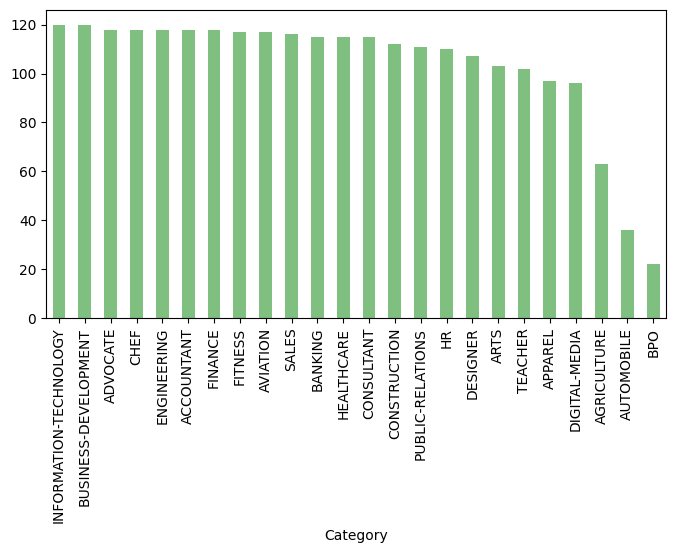

In [12]:
# LET'S VISUALIZE SOME RELATIONS
plt.figure(figsize=(8, 4))
count_= filtered_data['Category'].value_counts()
count_.plot(kind='bar', color='g', alpha=.5)

In [13]:
# EXPLORATORY DATA ANALYSIS (EDA)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [14]:
# ALL THE VALUES ARE CONTAINS SOME VALUES ( WHICH MEANS THEY AREN'T EMPTY)
filtered_data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [15]:
# All the job domain contains values and 'INFORMATION-TECHNOLOGY' and 'BUSINESS-DEVELOPMENT'
# CONTAINS MAXIMUM NUMBER OF RESUME AND BUSINESS PROCESS OUTSOURCING (BPO) HAS LESS
# WE CAN USE  OVERSAMPLING THE MINORITY CLASS, UNDER-SAMPLING THE MAJORITY CLASSES,
# COLLECT MORE DATA, GENERATE SYNTHETIC DATA TO BALANCED THE DATASET
# I SKIP THIS PART HERE
# from sklearn.utils import resample
# df_majority = filtered_data[filtered_data['Category'] != 'BPO']
# df_minority = filtered_data[filtered_data['Category'] == 'BPO']
# # # Oversample the minority class
# df_minority_oversampled = resample(df_minority, 
#                                    replace=True,    # Sample with replacement
#                                    n_samples=120,   # Number of samples in the majority class
#                                    random_state=42) # Reproducible results
# filtered_data_balanced = pd.concat([df_majority, df_minority_oversampled])
# print(filtered_data_balanced['Category'].value_counts())

In [16]:
resume_length =[len(i) for i in filtered_data['Resume_str']]

Text(0.5, 1.0, 'Resume length')

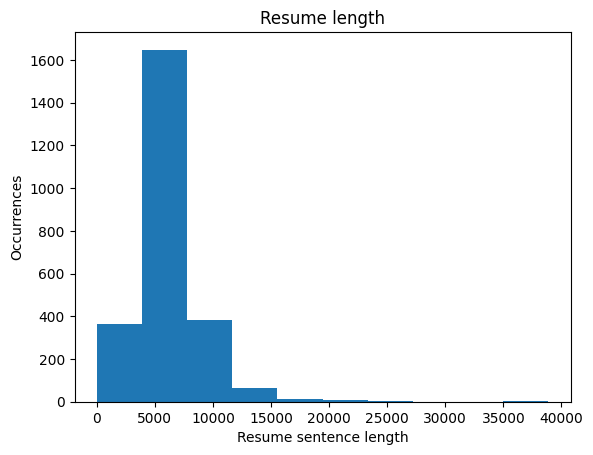

In [17]:
plt.hist(resume_length)
plt.xlabel('Resume sentence length')
plt.ylabel('Occurrences')
plt.title('Resume length')

In [18]:
#  UNDERSTANDING CENTRAL TENDENCY AND ASSESSING VARIABILITY OF DATA
import statistics
mean = sum(resume_length) / len(resume_length) #mean
std = statistics.pstdev(resume_length) #Standard deviation
print("Mean : ",mean, "    std : ",std)

Mean :  6295.3087761674715     std :  2768.69398426222


In [19]:
# OUT OF THE RANGE OF (MEAN +- 3*STD) IS CONSIDERED OUTLIER
vocab_size= int(mean+ (3*std))
vocab_size

14601

In [20]:
# DATA-CLEANING
import re
def data_clean(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.lower()
filtered_data['Resume_str'] = filtered_data['Resume_str'].apply(lambda x: data_clean(x))
filtered_data.sample(10)

,Resume_str,Category
354,teacher professional summary highly organized...,TEACHER
826,ce ified master personal trainer professional...,FITNESS
544,administrative assistant summary masters prep...,ADVOCATE
2404,lean six sigma black belt summary highly skil...,AVIATION
1548,secretary finance division summary an energet...,FINANCE
1957,senior construction manager summary construct...,CONSTRUCTION
1029,sales associate summary yoga instructor who i...,SALES
2068,administrative clerk public relations manager...,PUBLIC-RELATIONS
1086,sales representative summary ambitious yard m...,SALES
1219,media consultant professional summary film me...,CONSULTANT


In [24]:
import string
import nltk
from nltk.corpus import stopwords
del_words = ['name', 'city', 'state', 'country', 'fullname', 'company', 'resume', 'curriculum vitae', 'address', 'phone',
             'email', 'linkedin', 'profile', 'summary', 'objective', 'experience', 'education', 'skill', 'skills',
             'reference', 'references', 'contact', 'detail', 'details', 'mail', 'gmail', 'yahoo', 'hotmail', 'mailing',
             'linkedin', 'twitter', 'facebook', 'instagram', 'website', 'web', 'url', 'www', 'year'] 
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words = set(stopwords.words('english')+['``',"''"]+del_words)
total_words = []
sentences = filtered_data['Resume_str'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_sentences += sentence
    required_words = nltk.word_tokenize(sentence)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            total_words.append(word)
word_freq_fist = nltk.FreqDist(total_words)
most_freq = word_freq_fist.most_common(50)
print(most_freq)

[nltk_data] Downloading package stopwords to /home/nsl37/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('management', 12174), ('sales', 8275), ('customer', 7927), ('business', 7866), ('new', 6407), ('service', 6223), ('team', 6073), ('development', 5731), ('training', 5637), ('project', 5362), ('work', 4817), ('manager', 4534), ('information', 4502), ('marketing', 4489), ('financial', 4227), ('office', 4186), ('support', 4076), ('including', 4045), ('staff', 3949), ('professional', 3857), ('data', 3797), ('system', 3697), ('systems', 3559), ('university', 3477), ('managed', 3431), ('process', 3428), ('customers', 3418), ('design', 3383), ('quality', 3367), ('client', 3272), ('clients', 3244), ('developed', 3228), ('reports', 3083), ('analysis', 3052), ('operations', 3008), ('product', 2951), ('high', 2950), ('program', 2934), ('services', 2847), ('microsoft', 2830), ('ounting', 2829), ('01', 2793), ('2014', 2792), ('current', 2787), ('maintained', 2775), ('ounts', 2769), ('responsible', 2719), ('software', 2644), ('2013', 2554), ('procedures', 2549)]


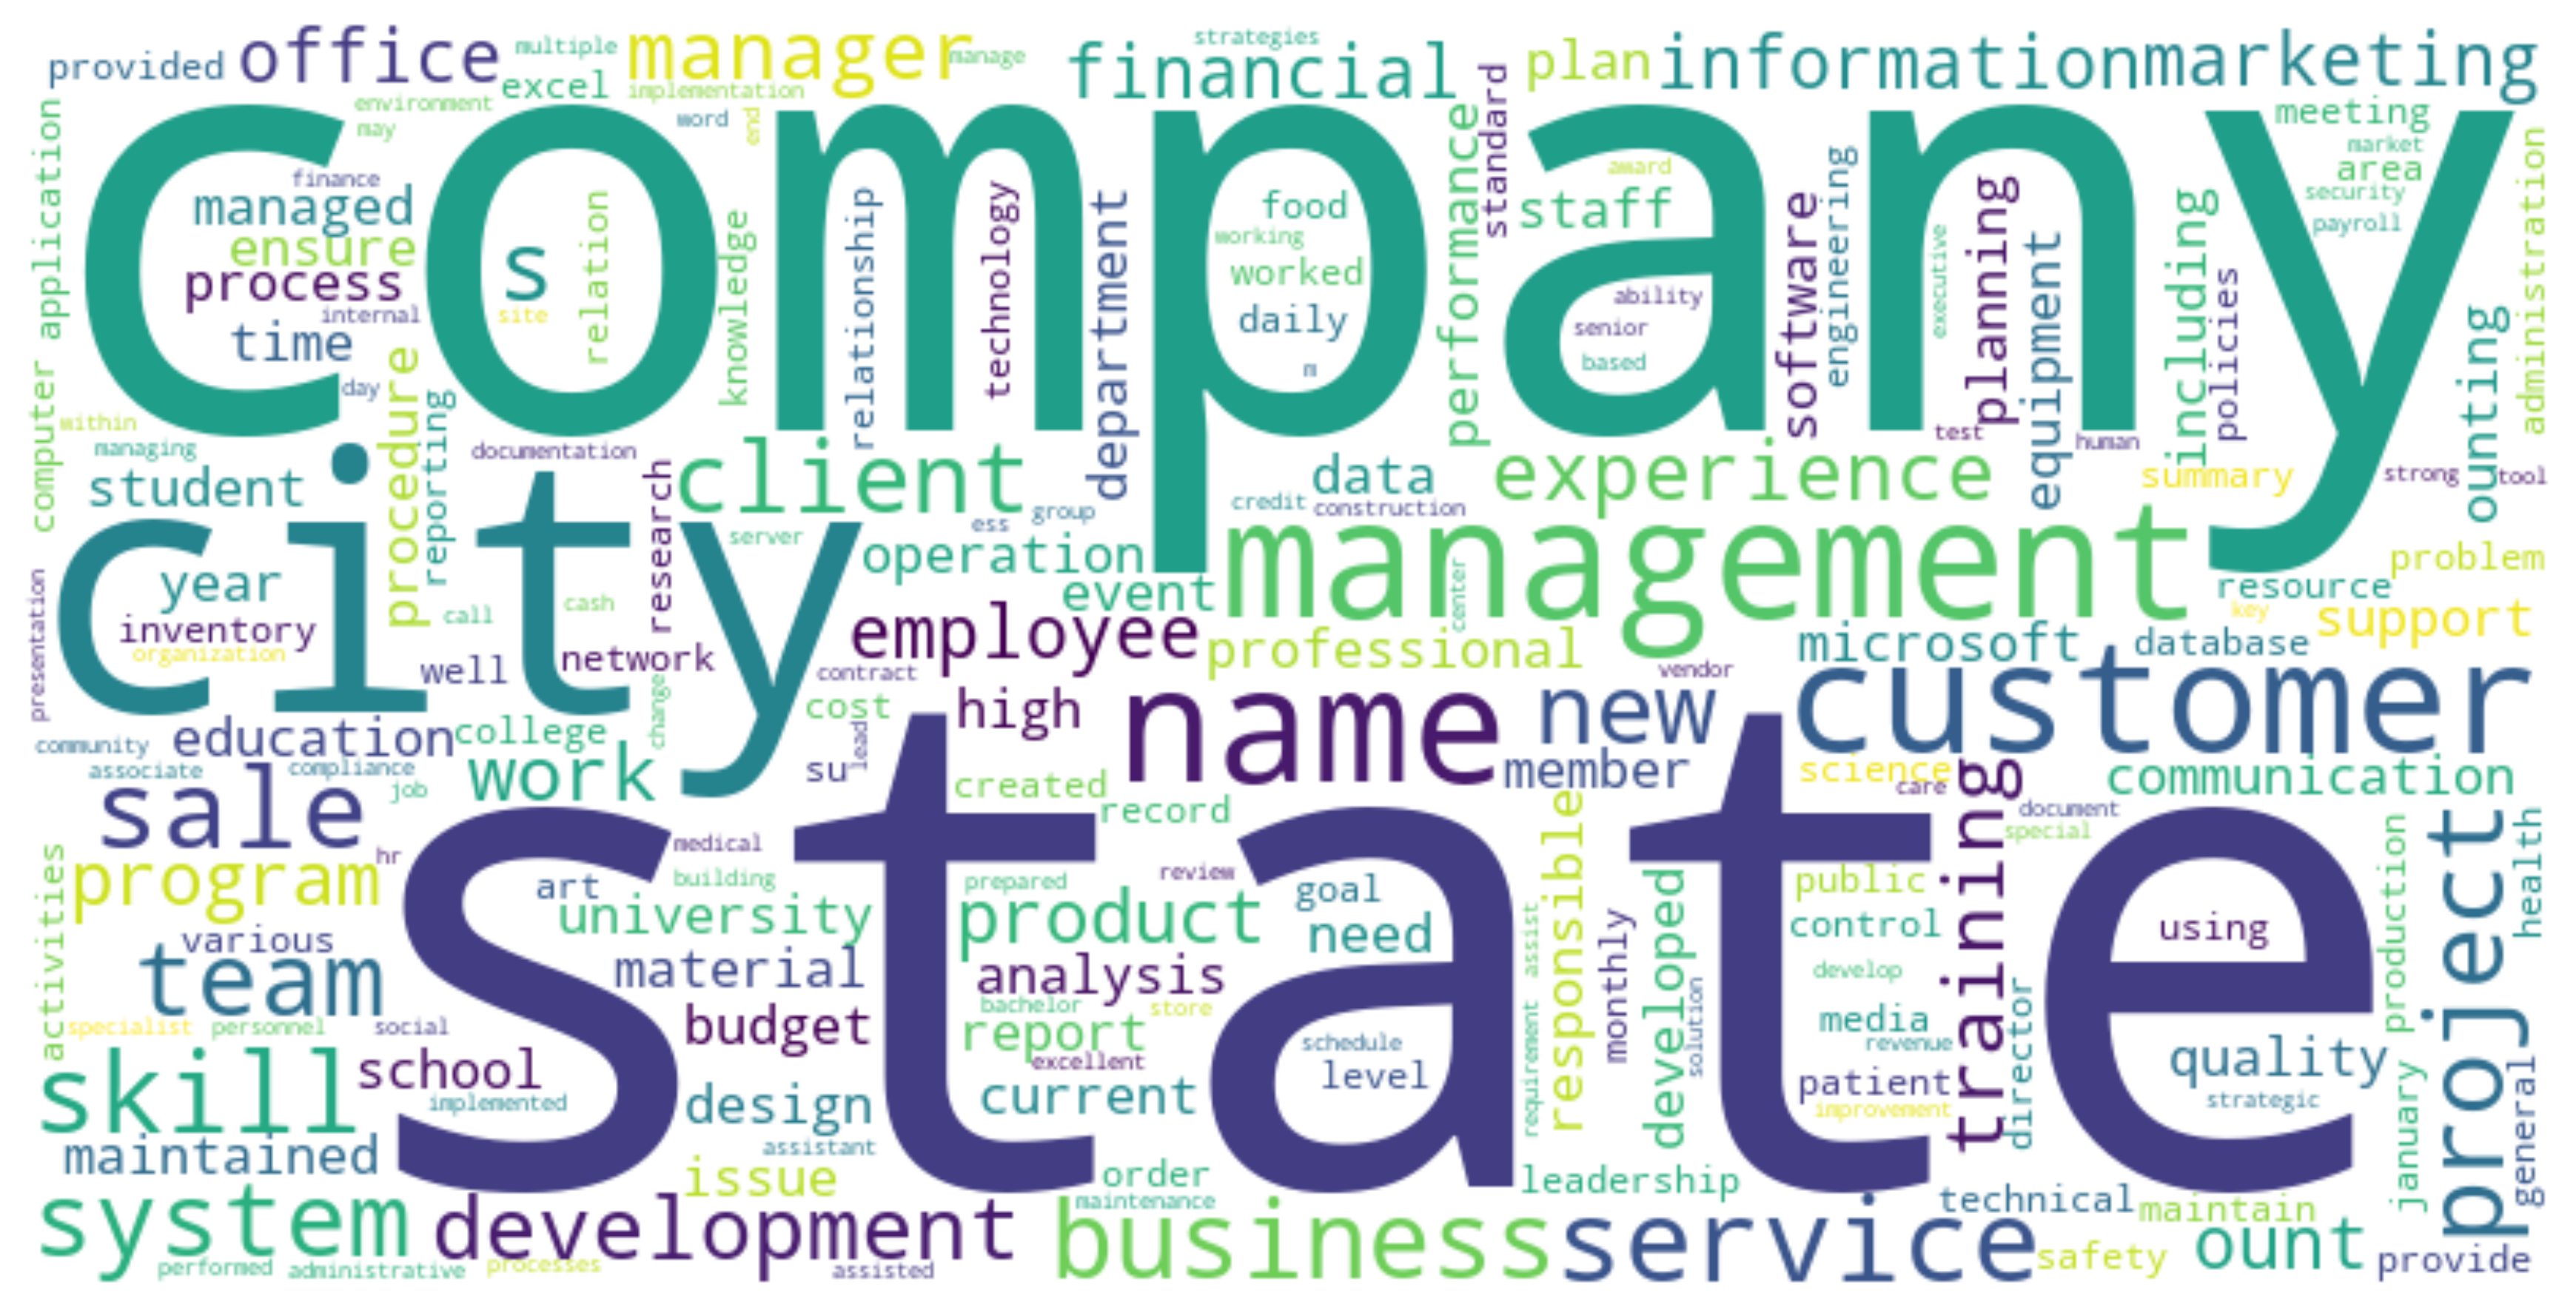

In [25]:
from wordcloud import WordCloud
wc = WordCloud(collocations=False, width=800, height=400, background_color='white').generate(cleaned_sentences)
plt.figure(figsize=(12,6), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [26]:
def split_data(data, train_ratio, val_ratio):
    train_end = int(len(data) * train_ratio)
    val_end = int(len(data) * (train_ratio + val_ratio))
    return data[:train_end], data[train_end:val_end], data[val_end:]

filtered_data = filtered_data.sample(frac=1).reset_index(drop=True)

# SPLITTING THE DATASET (70% TRAIN, 15% VALIDATION, 15% TEST)
train, validation, test = split_data(filtered_data, 0.7, 0.15)
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(validation)}")
print(f"Test set size: {len(test)}")

Training set size: 1738
Validation set size: 373
Test set size: 373


In [27]:
# MAKING SURE EACH SUBSET HAS ALL THE CLASSES
print(len(train["Category"].value_counts()))
print(len(test["Category"].value_counts()))
print(len(validation["Category"].value_counts()))

24
24
24


In [28]:
# SEPARATING DATASET FOR TRAINING PIPELINE
X_train=train['Resume_str']
X_test=test['Resume_str']
X_validation=validation['Resume_str']

y_train=train['Category']
y_test=test['Category']
y_validation=validation['Category']

In [29]:
# Length of all data
print("X_train      : ",(X_train.shape), "       y_train            :",(y_train.shape))
print("X_validation : ",(X_validation.shape), "        y_validation       :",(y_validation.shape))
print("X_test       : ",(X_test.shape), "        y_test             :",(y_test.shape))

X_train      :  (1738,)        y_train            : (1738,)
X_validation :  (373,)         y_validation       : (373,)
X_test       :  (373,)         y_test             : (373,)


In [30]:
# TRADITIONAL ML MODELS ON RAW DATA 
# FIRST TRY WITH TF-IDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer #Term Frequency Inverse Document Frequency
vectorizer = TfidfVectorizer(ngram_range=(1,5),max_features=vocab_size)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_validation_tfidf=vectorizer.transform(X_validation)

In [31]:
# NECESSARY METRICS FOR EVALUATION
from sklearn import metrics
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr,average="weighted")
    recall= metrics.recall_score(y_test,pr,average="weighted")
    f1= metrics.f1_score(y_test,pr,average="weighted")
    return acc_score,pre_score,recall,f1
acc_score = {}
pre_score = {}
recall_score={}
f1_score={}

In [32]:
# USED MULTIPLE MACHINE LEARNING ALGORITHM FOR CLASSIFICATION
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

logistic_regression = LogisticRegression(penalty='l1',solver='liblinear')
support_vector_machine = SVC(kernel='sigmoid',gamma=1.0)
decision_tree = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier(n_estimators=50,random_state=2)
bagging = BaggingClassifier(n_estimators=50,random_state=2)
gradient_boosting = GradientBoostingClassifier(n_estimators=50,random_state=2)


classifiers= {
    'LR':logistic_regression,
    'SVM':support_vector_machine,
    'DTC':decision_tree,
    'KNN':knn,
    'RFC':random_forest,
    'BG':bagging,
    'GBC':gradient_boosting,
}
for name,clf in classifiers.items():
    acc_score[name],pre_score[name],recall_score[name],f1_score[name] = score_prediction(clf,X_train_tfidf,X_validation_tfidf,y_train,y_validation)
print('Done!')

Done!


In [33]:
print("acc_score : ",acc_score,"\n")
print("pre_score : ",pre_score,"\n")
print("recall_score : ",recall_score,"\n")
print("f1_score : ",f1_score,"\n")

acc_score :  {'LR': 0.710455764075067, 'SVM': 0.5951742627345844, 'DTC': 0.23056300268096513, 'KNN': 0.4932975871313673, 'RFC': 0.6997319034852547, 'BG': 0.7211796246648794, 'GBC': 0.7667560321715817} 

pre_score :  {'LR': 0.7228814423565737, 'SVM': 0.629541630930382, 'DTC': 0.20393956487070986, 'KNN': 0.5391867366292002, 'RFC': 0.7321829545122654, 'BG': 0.7611437861482205, 'GBC': 0.8043248018486235} 

recall_score :  {'LR': 0.710455764075067, 'SVM': 0.5951742627345844, 'DTC': 0.23056300268096513, 'KNN': 0.4932975871313673, 'RFC': 0.6997319034852547, 'BG': 0.7211796246648794, 'GBC': 0.7667560321715817} 

f1_score :  {'LR': 0.703700170687437, 'SVM': 0.593909634444352, 'DTC': 0.20006232681987315, 'KNN': 0.49456637138281734, 'RFC': 0.686649925993569, 'BG': 0.7119425623958029, 'GBC': 0.775525865053592} 



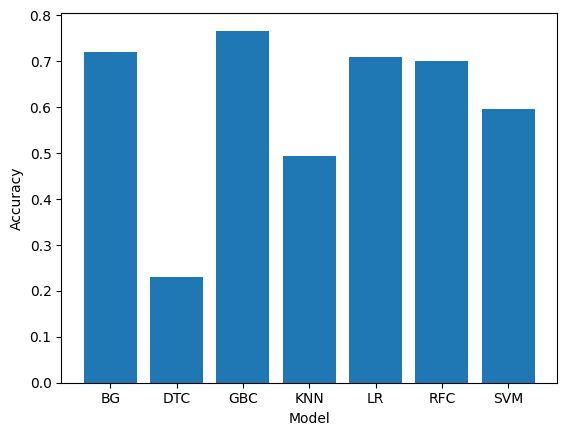

In [34]:
lists = sorted(acc_score.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar( x, y)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [35]:
# EXPERIMENT WITH DATA CLEANING PHASE-2
import nltk
from nltk.corpus import stopwords
del_words = ['name', 'city', 'state', 'country', 'fullname', 'company', 'resume', 'curriculum vitae', 'address', 'phone',
             'email', 'linkedin', 'profile', 'summary', 'objective', 'experience', 'education', 'skill', 'skills',
             'reference', 'references', 'contact', 'detail', 'details', 'mail', 'gmail', 'yahoo', 'hotmail', 'mailing',
             'linkedin', 'twitter', 'facebook', 'instagram', 'website', 'web', 'url', 'www', 'year'] 
nltk.download('stopwords')
# stop_words = stopwords.words('english')
# stop_words = set(stopwords.words('english')+['``',"''"]+del_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to /home/nsl37/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# CHECKING WHETHER THE ACCURACY IMPROVED WITH MORE DATA-CLEANING WITH DELETING STOP WORDS
# TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,5),max_features=vocab_size,stop_words=stopwords.words('english'))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_validation_tfidf=vectorizer.transform(X_validation)
score_tfidf = score_prediction(gradient_boosting,X_train_tfidf,X_validation_tfidf,y_train,y_validation)
print("score_tfidf (gradient_boosting) : ",score_tfidf)

score_tfidf (gradient_boosting) :  (0.7426273458445041, 0.7643694884729421, 0.7426273458445041, 0.7478889946952645)


In [38]:
# CHECKING WHETHER THE ACCURACY IMPROVED WITH MORE DATA-CLEANING WITH DELETING STOP WORDS
# BAG-OF-WORDS 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,5),max_features=vocab_size,stop_words=stopwords.words('english'))
X_train_bow = vectorizer.fit_transform(X_train)
X_validation_bow=vectorizer.transform(X_validation)
score_bow = score_prediction(gradient_boosting,X_train_bow,X_validation_bow,y_train,y_validation)
print("score_bow (gradient_boosting) : ",score_bow)

score_bow (gradient_boosting) :  (0.8016085790884718, 0.8297208421996767, 0.8016085790884718, 0.8046051522506185)


In [39]:
# FROM THIS WE CAN MAKE A DECISION THAT WITH BAG-OF-WORDS, THE ML ALGORITHMS WORKS BETTER ON GRADIENT BOOSTING ALGORITHM.
# DATASET FOR FINAL TRAIN-TEST
import joblib
vectorizer = CountVectorizer(ngram_range=(1,5),max_features=vocab_size,stop_words=stopwords.words('english'))
X_train_bow = vectorizer.fit_transform(X_train)
X_validation_bow = vectorizer.transform(X_validation)
X_test_bow = vectorizer.transform(X_test)
joblib.dump(vectorizer, './model/bow_vectorizer.pkl')


['./model/bow_vectorizer.pkl']

In [41]:
# SAVING EACH DATASET THAT WE OBTAINED AFTER SPLITTING INTO 80-10-10 RATIO
train.to_csv('./dataset/train.csv',index=False)
test.to_csv('./dataset/test.csv',index=False)
validation.to_csv('./dataset/validation.csv',index=False)
print('Dataset Saved!')

Dataset Saved!


In [42]:
# GRADIENT_BOOSTING FINAL TRAIN-TEST
gradient_boosting = GradientBoostingClassifier(n_estimators=50,random_state=2)
gradient_boosting.fit(X_train_bow,y_train)
predicted = gradient_boosting.predict(X_test_bow)
acc_score = metrics.accuracy_score(y_test,predicted)
pre_score = metrics.precision_score(y_test,predicted,average="weighted")
recall= metrics.recall_score(y_test,predicted,average="weighted")
f1= metrics.f1_score(y_test,predicted,average="weighted")
print("GRADIENT_BOOSTING \n","accuracy: " + str(acc_score)+" precision: "+ str(pre_score) + " recall: "+ str(recall)+ " f1-score: "+str(f1))

GRADIENT_BOOSTING 
 accuracy: 0.7828418230563002 precision: 0.8029003590609762 recall: 0.7828418230563002 f1-score: 0.7820351542437189


In [44]:
# SAVING THE BEST MODEL
import pickle
pickle.dump(gradient_boosting, open('./model/gradient_boosting_model.sav', 'wb'))

In [46]:
# LOADING THE MODEL FOR REUSE
filename='./model/gradient_boosting_model.sav'
gradient_boosting_load=pickle.load(open(filename, 'rb'))

# AGAIN EVALUATING THE MODEL'S PERFORMANCE ON TEST_DATA
predicted = gradient_boosting.predict(X_test_bow)
acc_score = metrics.accuracy_score(y_test,predicted)
pre_score = metrics.precision_score(y_test,predicted,average="weighted")
recall= metrics.recall_score(y_test,predicted,average="weighted")
f1= metrics.f1_score(y_test,predicted,average="weighted")
print("GRADIENT_BOOSTING \n","accuracy: " + str(acc_score)+" precision: "+ str(pre_score) + " recall: "+ str(recall)+ " f1-score: "+str(f1))

GRADIENT_BOOSTING 
 accuracy: 0.7828418230563002 precision: 0.8029003590609762 recall: 0.7828418230563002 f1-score: 0.7820351542437189
